# Churn Prediction and Lifetime Value Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

##### **Project Background:** In the ever-evolving telecommunication sector, retaining customers and accurately forecasting churn is essential for sustaining growth and profitability. This project seeks to harness advanced classification models to deliver a thorough understanding of customer behaviour for a prominent telecommunication company.

##### **Project Objective:** The project will focus on two areas:
- Churn Prediction: The project will develop and implement machine learning models to predict which customers are likely to leave the network by examining the various customer     metrics and behaviours to uncover the primary reasons behind churn, allowing for strategic improvements in customer service and satisfaction.

- Customer Lifetime Value: Attempt the estimation of the lifetime value of each customer which has the potential to provide actionable insights into the long-term revenue each 
    customer brings. 
    This analysis will help prioritize efforts on high-value customers and inform targeted marketing and retention initiatives.

Through this initiative, the telecommunication company will gain a deeper, data-driven understanding of its customer base, enabling more effective decision-making to enhance customer loyalty and drive sustained business success.
 
##### **Stakeholders:**
- Telecommunication provider

##### **Key metrics and success Criteria:**
- Model should have accuracy scores of 85% (on balance data)
- Good models are expected to have an F1 score of > 80%
- An ROC Curve of 80% is ideal for the model to generalise well
- There should be a minimum of 4 Baseline models
- All hyperparameter tuning should only be applied to the Baseline models if they exceed their F1 score


##### **Features/Columns:**
- customerID
- gender: Whether the customer has a partner or not (Yes, No)
- SeniorCitizen: Whether a customer is a senior citizen or not
- Partner
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure:  Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract: The contract term of the customer (Month-to-Month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn

##### **Hypothesis:** 

**A. Null Hypothesis (H0):**
There is no statistical significant relationship between churn rate and the contract term of the customer

**C. Alternate Hypothesis (H1):**
There is a statistical significance relationship between churn rate and the contract term of the customer

##### **Key Business Questions:**
- What is the churn rate for customers with only Phone_service
- Does the type of contract affect the rate of churn?
- How does the customer payment_method vary with the churn rate?
- Is churn affected by the presence of partner or dependents?


[Back to Top](#Table-of-Contents)
## Step 2: Data Understanding

`Project Initialization`

`Data Collection`

`EDA & Data Cleaning`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.

**A. Data Quality Assessment & Exploring the data (info, duplicates, null values, describe etc.)**
- Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times.
- Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of customer churns or other extraneous information
- Combine dataframes into a single dataframe if necessary

**B. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others

**C. Bivariate Analysis:**
Explore, analyze and visualize the relationship variables pairs of different dimensions

**D. Multivariate Analysis:**
Explore, analyze and visualize the relationship among variables

**E. Answer Analytical Questions & deploy their visualisations to Power Bi:**

**F. Test Hypothesis:**

**G. Provide insights:**


### Project Initialisation

In [1]:
# Importing necessary libraries

# Environment variables management
from dotenv import dotenv_values

# Database connection
import pyodbc
import MySQLdb
import mysql.connector
import pymysql

# Data handling
import pandas as pd
import numpy as np

# Data handling and utilities
import re
import calendar
import warnings

# Data fetching
import requests

# Statistical analysis
from scipy.stats import skew, kurtosis

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data imputation
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Feature Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import catboost as cb
import lightgbm as lgb
import xgboost as xgb

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# set theme
sns.set_theme(style="white", palette="pastel", font="sans-serif", font_scale=1.5)
plt.style.use("default")
custom_palette = ["cyan", "magenta", "yellow"]

# Other packages
import os
import pickle



### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the LP2_Telco_churn_first_3000 from Microsoft SQL Server
Connect to the database using provided credentials

In [2]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values(".env")

# get the values for the environment variables
server = environment_variables.get("DBS")
login = environment_variables.get("DBU")
password = environment_variables.get("DBP")
database = environment_variables.get("DBN")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


##### Fetch Information Schema for tables in the database

In [3]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA                  TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP2_Telco_churn_first_3000  BASE TABLE


##### Load LP2_Telco_churn_first_3000 Data

In [4]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM LP2_Telco_churn_first_3000        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df_3000 = pd.read_sql(db_query, connection)

# # Display DataFrame Info
# df_3000.info()
# print()

# # Display the DataFrame
# df_3000.tail(2)

#### Access the LP2_Telco-churn-second-2000 data from GitHub Repository

In [5]:
# URL of the file to download
url = "https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv"

# Local file path where the file will be saved
local_file_path = '../data/Telco-churn-second-2000.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Read the downloaded CSV file into a DataFrame
df_2000 = pd.read_csv(local_file_path)

# # Display DataFrame Info
# print()
# df_2000.info()
# print()

# # Display the DataFrame
# df_2000.head()    

File downloaded successfully


#### Access Telco-churn-last-2000 data from OneDrive

project_root/
├── notebook.ipynb
└── data/
    └── Telco-churn-last-2000.xlsx

C:/Users/wolak/Documents/DSC Accelerator/Machine-Learning-Prediction-Model-for-a-Telecommunications-Provider/data/Telco-churn-last-2000.xlsx

In [6]:
# Ensure the current working directory is set to the directory where the notebook is located
# This is important if others are running the notebook
notebook_dir = os.path.dirname(os.path.abspath('C:/Users/wolak/Documents/DSC Accelerator/Machine-Learning-Prediction-Model-for-a-Telecommunications-Provider/data/Telco-churn-last-2000.xlsx'))
os.chdir(notebook_dir)

# Path of the Excel file using a relative path
file_path = os.path.join('..', 'data', 'Telco-churn-last-2000.xlsx')

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_test = pd.read_excel(file_path)
        
        # Display DataFrame Info
        df_test.info()
        print()
        
        # # Display the DataFrame
        # df_test.head()
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")




File exists at the specified path.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  Paperle

### **Exploratory Data Analysis (EDA)**

- **A. Data Quality Assessment & Data exploration**

In [7]:
# Check the datatype and the number of columns
df_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
# Check the datatype and the number of columns
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [9]:
# Print column names of all Dataframes
print("Column names of LP2_Telco_churn_first_3000 dataframe:")
print(df_3000.columns)

print("\nColumn names LP2_Telco-churn-second-2000 dataframe:")
print(df_2000.columns)

print("\nColumn names Telco-churn-last-2000 dataframe:")
print(df_test.columns)

Column names of LP2_Telco_churn_first_3000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names LP2_Telco-churn-second-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names Telco-churn-last-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'ten

In [10]:
# Check shape of the dataframes

print("Number of columns in LP2_Telco_churn_first_3000 dataframe:", df_3000.shape[1])
print("Number of columns in LP2_Telco-churn-second-2000 dataframe:", df_2000.shape[1])
print("Number of columns in 2Telco-churn-last-2000 dataframe:", df_test.shape[1])

Number of columns in LP2_Telco_churn_first_3000 dataframe: 21
Number of columns in LP2_Telco-churn-second-2000 dataframe: 21
Number of columns in 2Telco-churn-last-2000 dataframe: 20


In [11]:
# Combine the df_3000 and df_2000 based on their similarities into a single dataframe
df_train = pd.concat([df_3000, df_2000], ignore_index=True)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
# Create a copy of the original DataFrame to preserve the original data
df_train_eda = df_train.copy()


In [13]:
# Convert the TotalCharges column to float and SeniorCitizen back to booleans
df_train_eda['TotalCharges'] = pd.to_numeric(df_train_eda['TotalCharges'], errors='coerce')

df_train_eda['SeniorCitizen'] = df_train_eda['SeniorCitizen'].astype('bool')
df_train_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [14]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows = df_train_eda[df_train_eda.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in df_train dataset:")
print()
print(missing_percentage)
print("\nNumber of duplicated rows in df_train dataset:", duplicate_count)
print("\nDuplicated rows in the df_train dataset:")
duplicated_rows

Proportion of missing values in df_train dataset:

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        5.33
InternetService      0.00
OnlineSecurity      12.91
OnlineBackup        12.91
DeviceProtection    12.91
TechSupport         12.91
StreamingTV         12.91
StreamingMovies     12.91
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.16
Churn                0.02
dtype: float64

Number of duplicated rows in df_train dataset: 0

Duplicated rows in the df_train dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
columns = df_train_eda.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
for column in columns:
    print(f'{column}')
    print(f'There are {df_train_eda[column].unique().size} unique values')
    print(f'{df_train_eda[column].unique()}')
    print('=' * 60)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
[False  True]
Partner
There are 4 unique values
[True False 'No' 'Yes']
Dependents
There are 4 unique values
[False True 'No' 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
MultipleLines
There are 6 unique values
[None False True 'No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
OnlineBackup
There are 6 unique values
[True False None 'No' 'Yes' 'No internet s

In [17]:
# Define the standardization function
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value
    else:
        return 'Unknown'

# List of columns to standardize
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen'
]

# Apply the standardization function to each column
for column in columns_to_standardize:
    df_train_eda[column] = df_train_eda[column].apply(standardize_value)

# Confirm the changes
for column in columns_to_standardize:
    unique_values_after = df_train_eda[column].unique()
    print(f'Unique values in {column} after standardization:', unique_values_after)
    print(df_train_eda[column].value_counts())
    print()


Unique values in Partner after standardization: ['Yes' 'No']
Partner
No     2585
Yes    2458
Name: count, dtype: int64



Unique values in Dependents after standardization: ['No' 'Yes']
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Unique values in PhoneService after standardization: ['No' 'Yes']
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Unique values in MultipleLines after standardization: ['Unknown' 'No' 'Yes' 'No phone service']
MultipleLines
No                  2424
Yes                 2130
Unknown              269
No phone service     220
Name: count, dtype: int64

Unique values in OnlineSecurity after standardization: ['No' 'Yes' 'Unknown' 'No internet service']
OnlineSecurity
No                     2507
Yes                    1456
Unknown                 651
No internet service     429
Name: count, dtype: int64

Unique values in OnlineBackup after standardization: ['Yes' 'No' 'Unknown' 'No internet service']
OnlineBackup
No                     2231
Yes                    1732
Unknown                 651
No internet service     429
Name: count, dtype: int64

Uni

In [19]:
df_train_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [20]:
df_train_eda.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,2,No,4224
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,4,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231


In [21]:
df_train_eda.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,Unknown,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


In [30]:
# For ease of analysis, the features of the df_train_eda have been categorised as follows:
target = ['Churn']
subscriber_account_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod'] # customerID
subscribtions = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

- **B. Univariate Analysis**

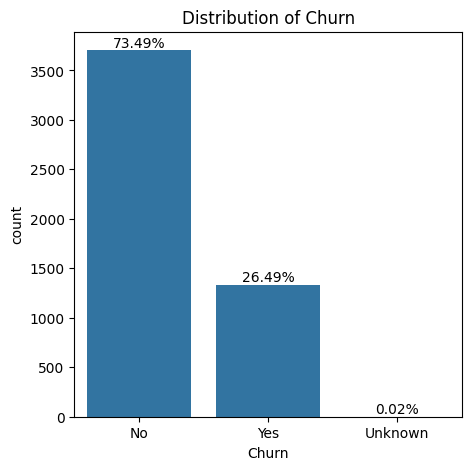

In [31]:
# Target(Churn) variable
target = 'Churn'
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df_train_eda["Churn"])
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h.get_height()/len(df_train)*100:.2f}%' for h in container])
plt.title(f'Distribution of Churn')
plt.show()

tenure
Skew : 0.23


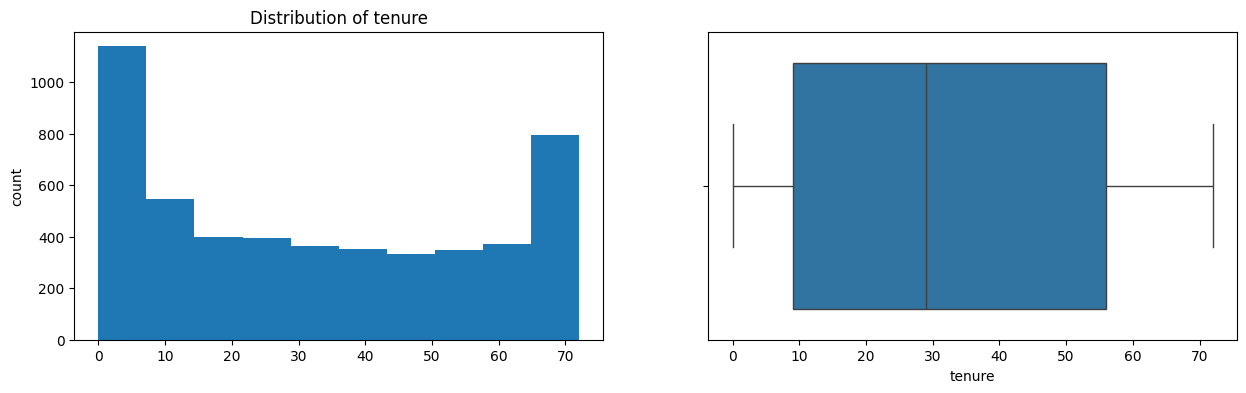

MonthlyCharges
Skew : -0.24


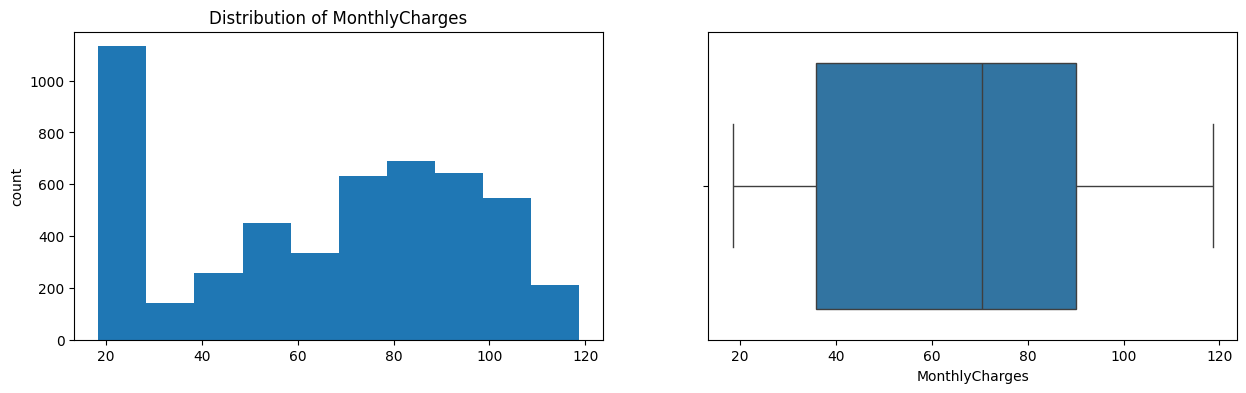

TotalCharges
Skew : 0.94


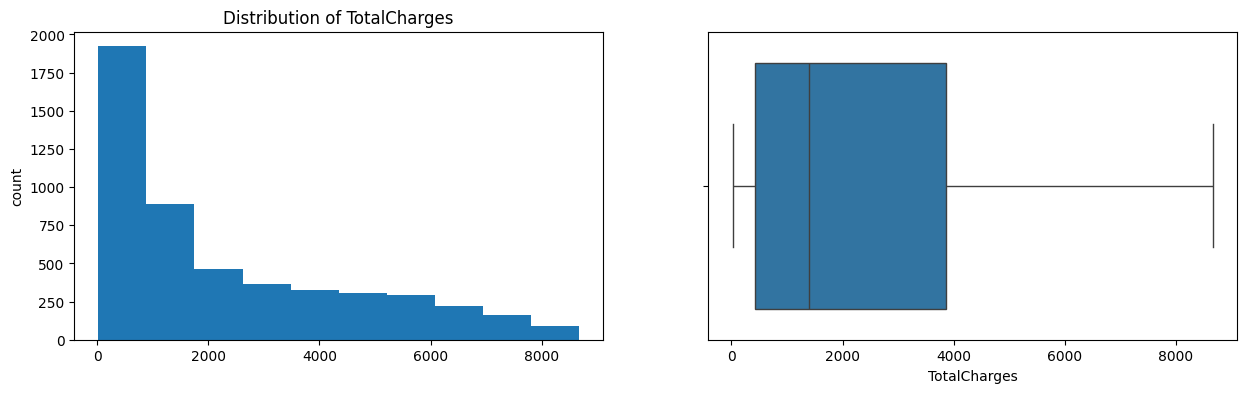

In [32]:
for col in subscriber_account_numerical:
    print(col)
    print('Skew :', round(df_train_eda[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_train_eda[col].hist(grid=False)
    plt.ylabel('count')
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col])
    plt.show()

- The tenure's skewness value of 0.23 indicates a slight positive skew. 

- The MonthlyCharges' skewness value of -0.24 indicates a slight negative skew. 

- The TotalCharges' skewness value of 0.94 indicates a moderate positive skew. 

- The TotalCharges' calibration are out of sync with the the other numerical features

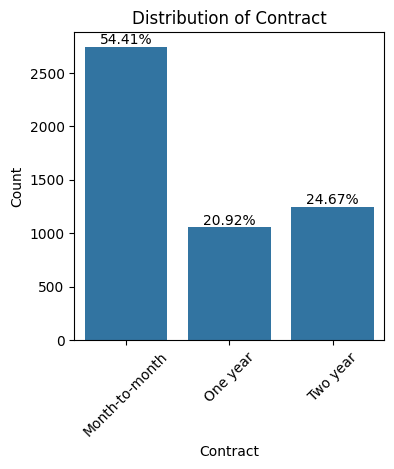

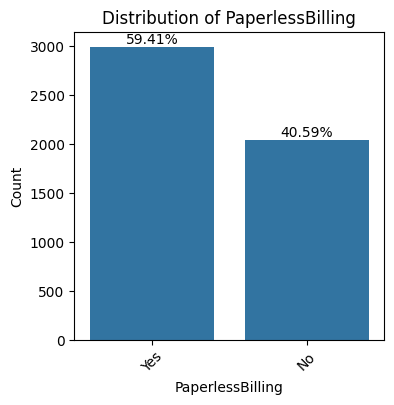

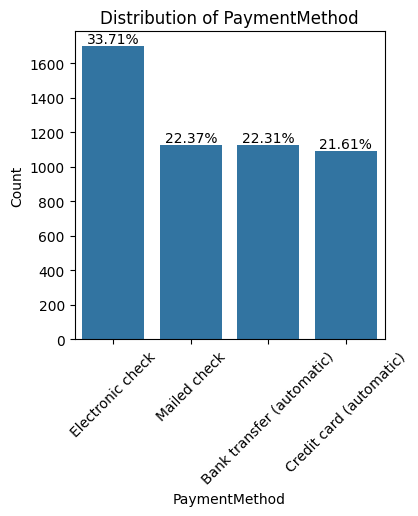

In [33]:
# Subscriber Account categorical features less CustomerID
for feature in subscriber_account_categorical:
    plt.figure(figsize=(4, 4))
    ax = sns.countplot(data=df_train_eda, x=feature)
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.2f}%' for h in container])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

- For the Subscriber Account segment, 54% the contracts are month-to-month and the rest of the 46% are almost evenly split the annual & 2years contracts

- 59% of the Subscriber Account are on Paperless Billing

- 33.7% of the Subscriber Account are on Electronic Check Payment Method

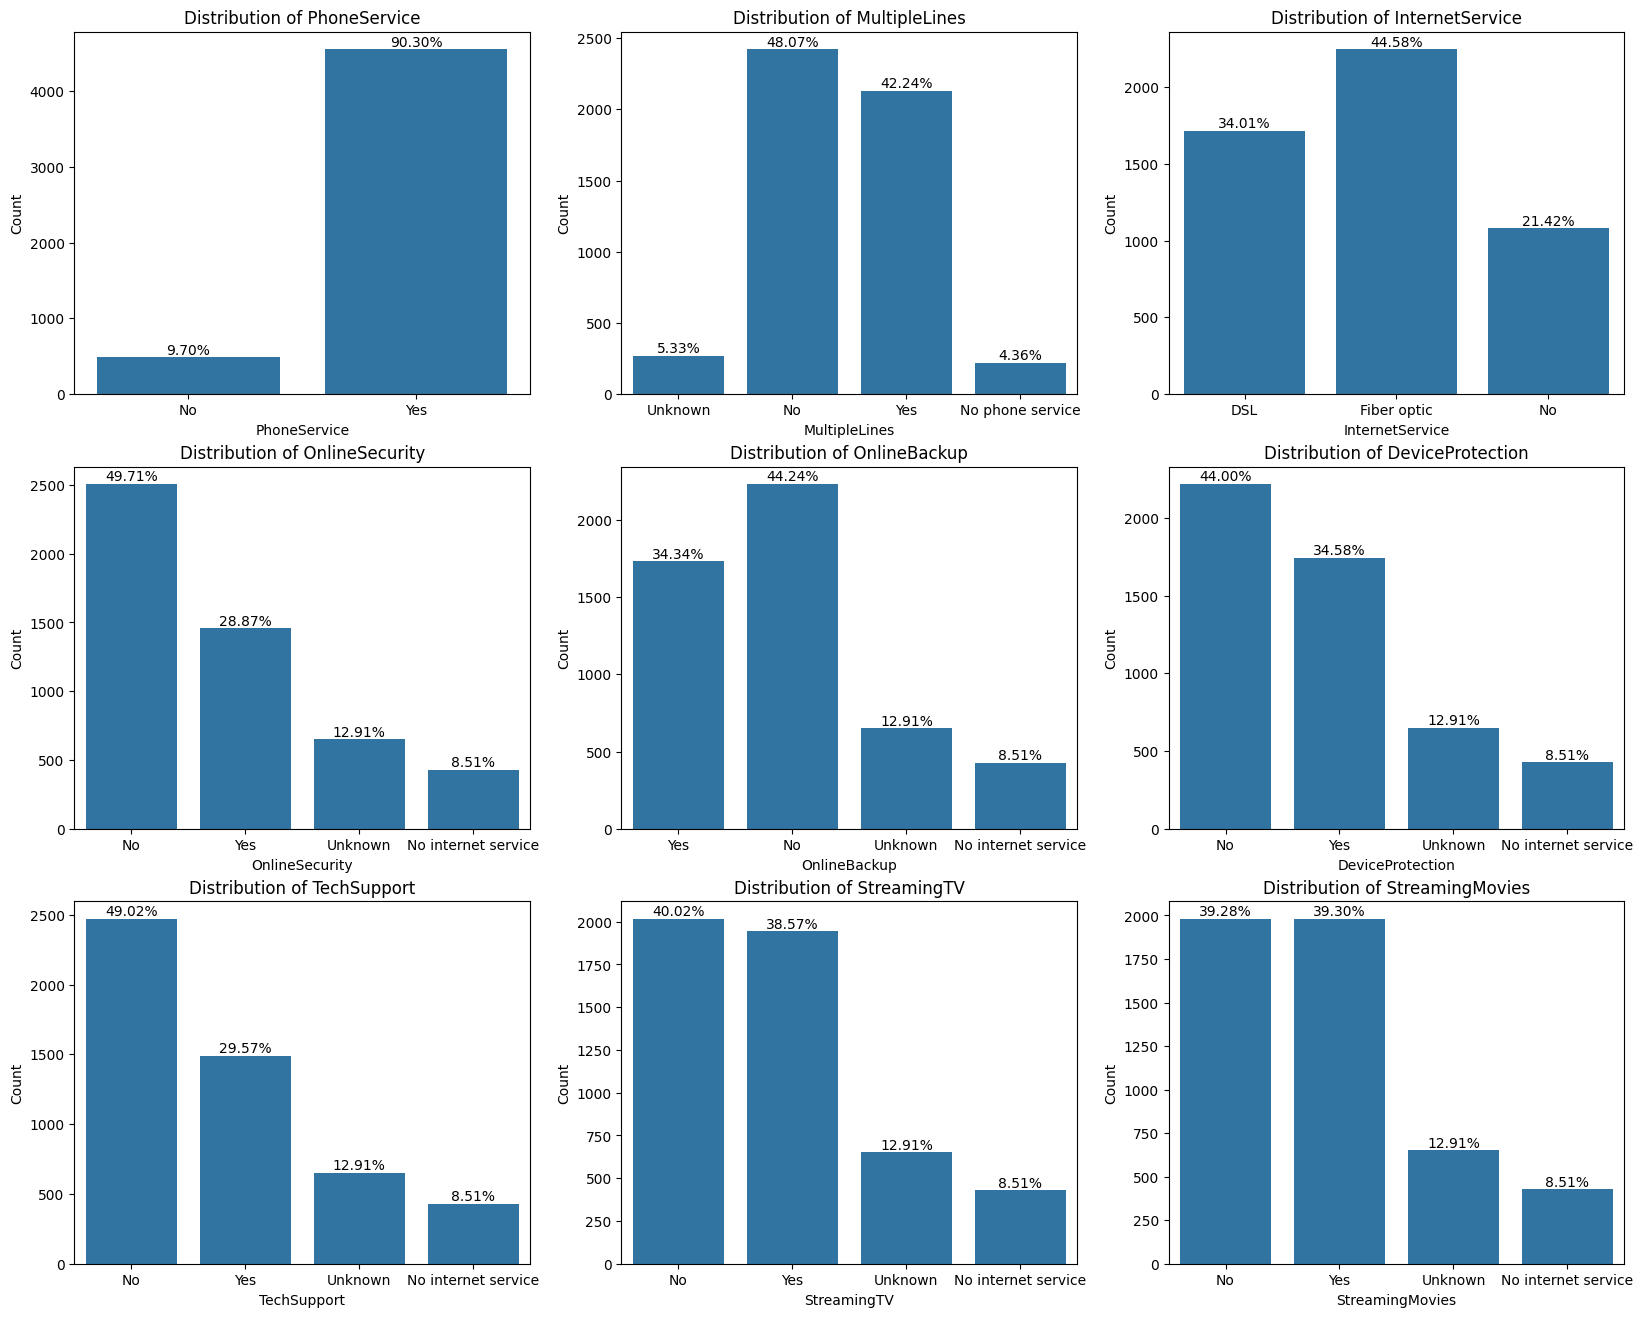

In [34]:
# Distribution of Subscibtions

# Calculate the number of rows and columns needed for subplots
num_features = len(subscribtions)
cols = 3
rows = (num_features // cols) + (num_features % cols)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each subscription feature and create a count plot
for i, feature in enumerate(subscribtions):
    ax = axes[i]
    sns.countplot(data=df_train_eda, x=feature, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.2f}%' for h in container])
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

- **C. Bivariate Analysis**

In [35]:
# Define a function to plot categorical features versus the target('Churn') variable
import math

def plot_categorical_feature_vs_target(df_train_eda, categorical_features, target):
    number_of_columns = 3
    number_of_rows = math.ceil(len(categorical_features)/3)
    fig = plt.figure(figsize=(20, 6*number_of_rows))

    for i, column in enumerate(categorical_features, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, i)
        sns.countplot(data=df_train_eda, x=column, hue=target, ax=ax)
        ax.set_xlabel(column)
        ax.set_title(f'Distribution of {column}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])
    return plt.show()


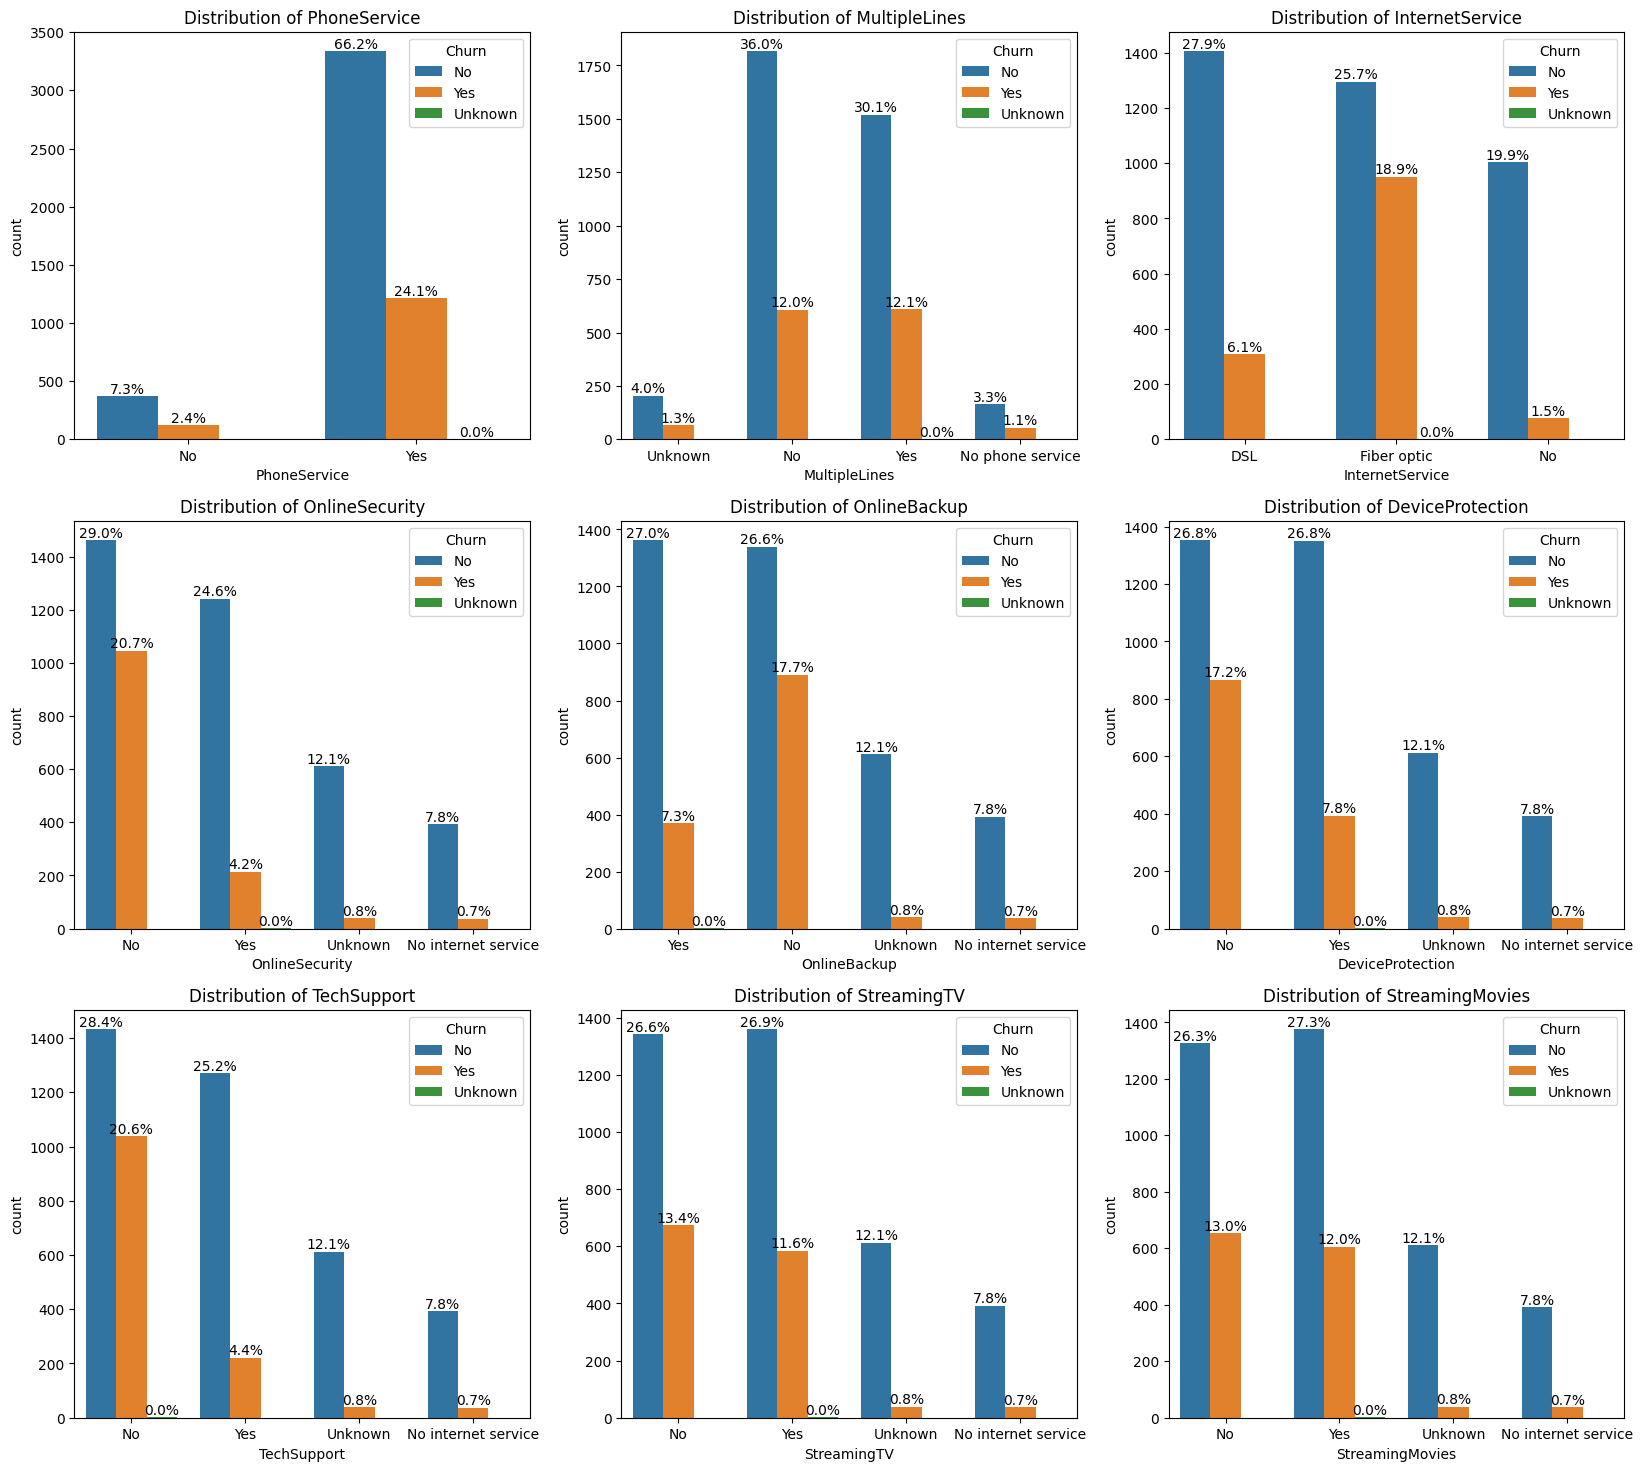

In [ ]:
# Subscribtions are services subscribed to by the customers
subscribtions = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_feature_vs_target(df_train, subscribtions, "Churn")

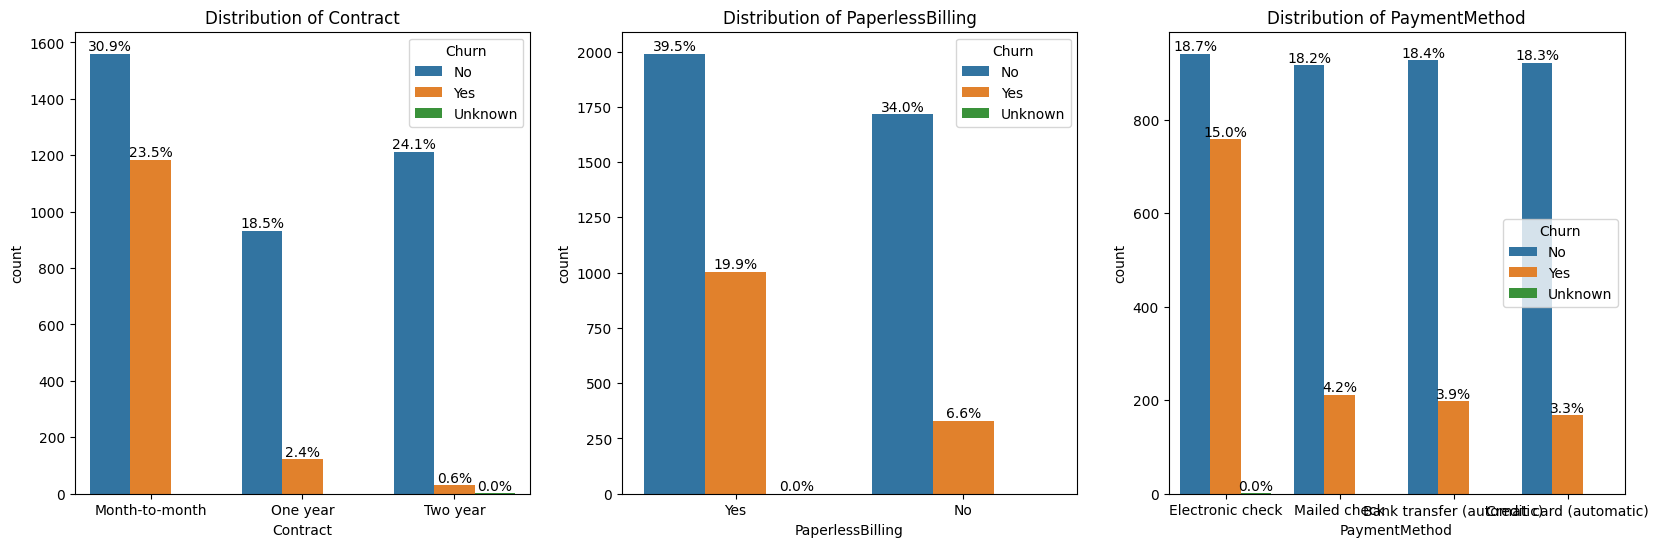

In [36]:
# Account Categorical features vs Target(Churn)
subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, subscriber_account_categorical, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

In [37]:
# Define a function to check for outliers in the Account Numerical features and plot their distributions versus the 'Churn'.

def check_for_outliers(df_train_eda, numerical_features):
    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df_train_eda, x='Churn', y=feature, palette='viridis')
        plt.title(f'{feature}')
        plt.xlabel(feature)
        plt.ylabel(feature)
    plt.savefig('Outlier_check.png', bbox_inches='tight')
    return plt.show()

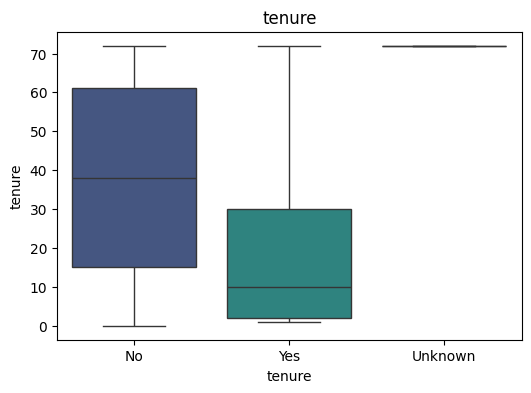

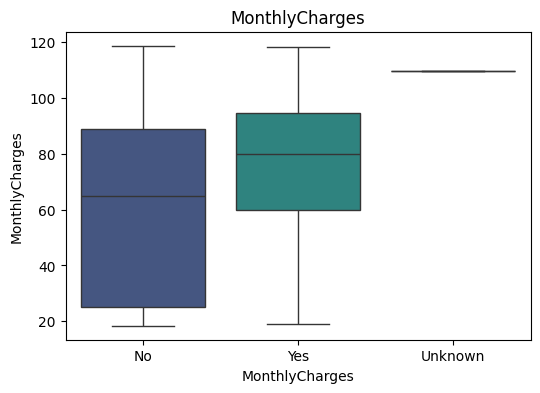

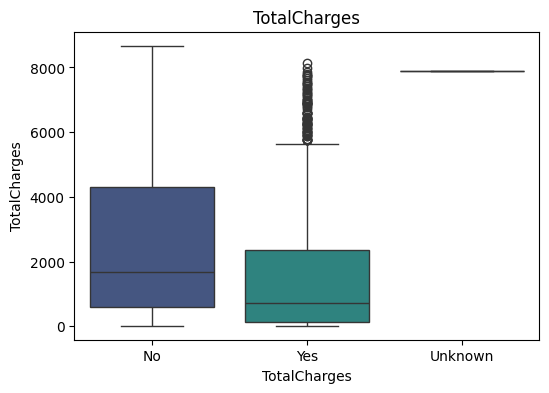

In [38]:

check_for_outliers(df_train_eda, subscriber_account_numerical)

- TotalCharges Churn has outliers

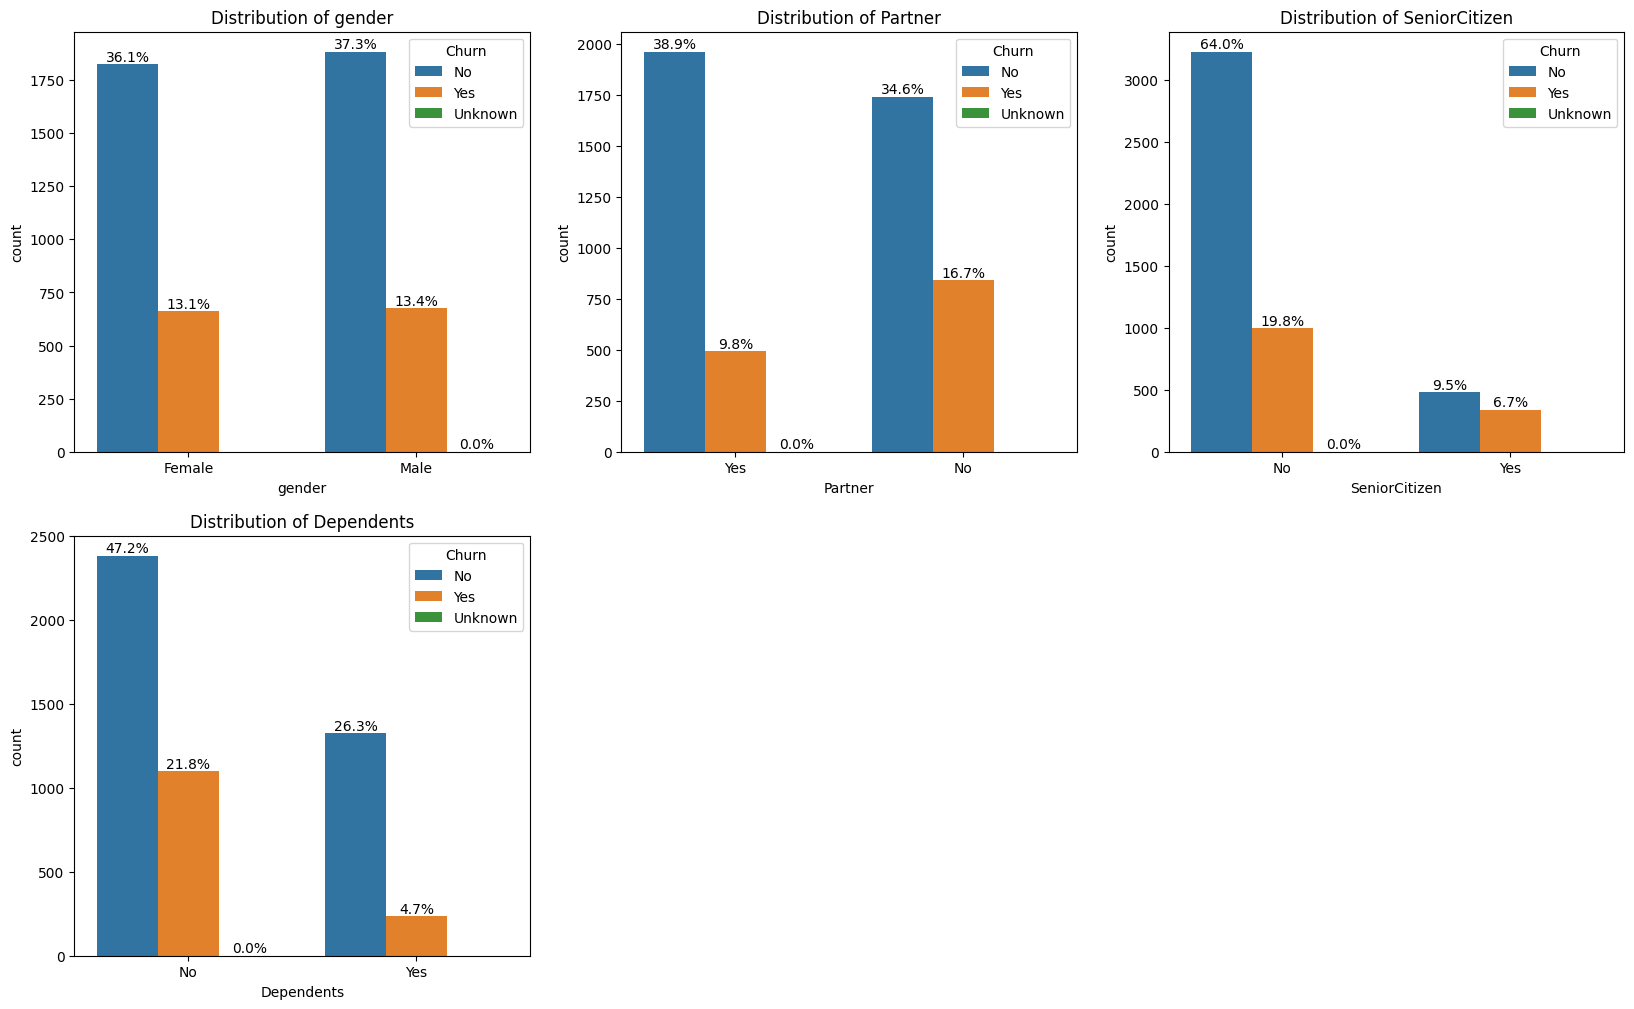

In [39]:
# Subcriber Demographic Information('gender', 'Partner', 'SeniorCitizen', 'Dependents')

subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, subscriber_demographic, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The Churn rate of Subscriber Demographics are as follows: ['gender'] both Males and Females are approximately 13%.

- Subscribers with ['Partners'] Churn at 9.8% versus those without Churn at 16%

- Subscribers with ['Dependents'] Churn at only 4.7% versus those without Churn at 21%


- **C. Multivariate Analysis**

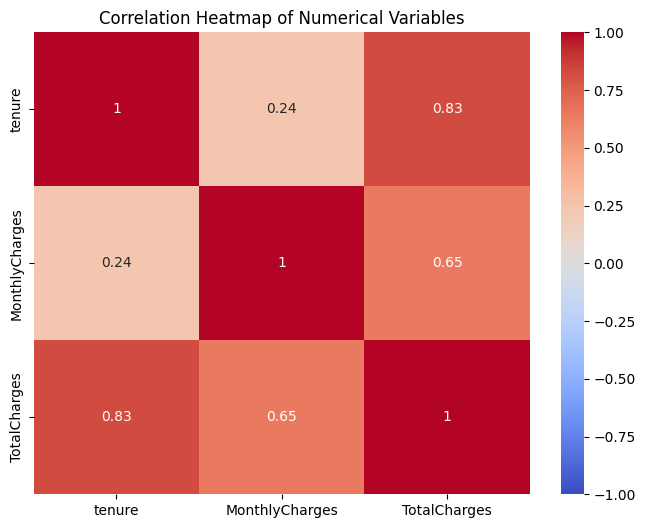

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train_eda[subscriber_account_numerical].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


- The tenure has a strong positive correlation with TotalCharges at 0.83

- The tenure has a weak positive correlation MonthlyCharges at 0.24

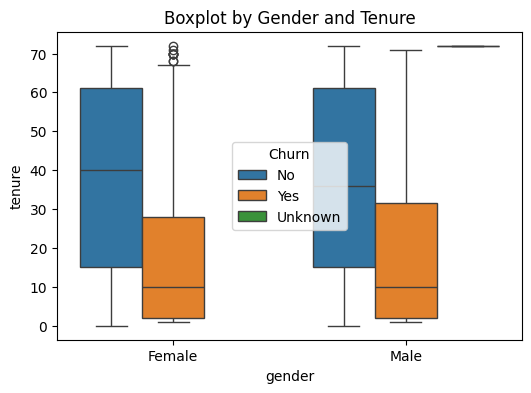

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='tenure', hue='Churn', data=df_train_eda)
plt.title('Boxplot by Gender and Tenure')
plt.show()


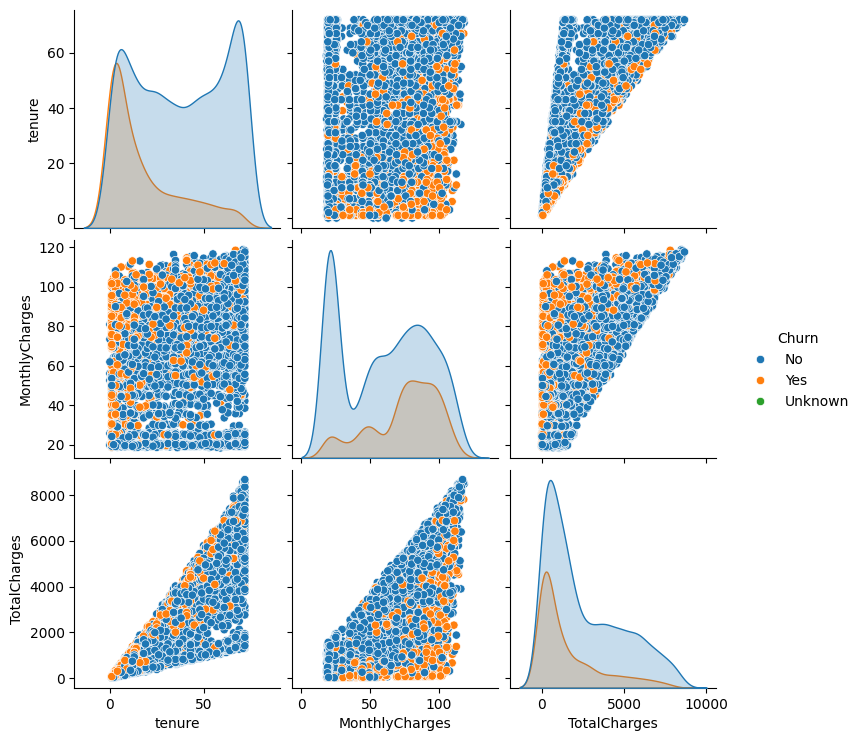

In [ ]:
subscriber_account_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df_train, hue='Churn')
plt.show()

- **D. Analytical Questions**

1. What is the churn rate for customers with only Phone_service

Churn rate for customers with only PhoneService:
Churn
No         73.276241
Yes        26.701801
Unknown     0.021959
Name: proportion, dtype: float64


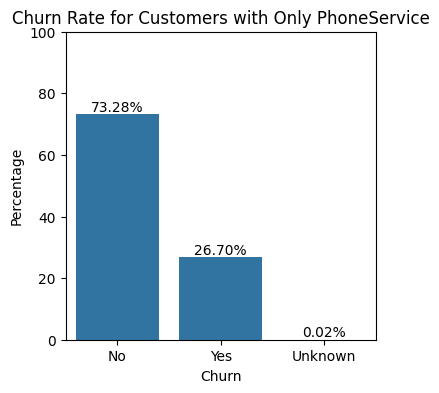

In [42]:

# Filter customers with only PhoneService
phone_service_only = df_train_eda[(df_train_eda['PhoneService'] == 'Yes')] 

# Calculate churn rate
churn_rate = phone_service_only['Churn'].value_counts(normalize=True) * 100

# Print churn rate
print("Churn rate for customers with only PhoneService:")
print(churn_rate)

# Visualize the churn rate
plt.figure(figsize=(4, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate for Customers with Only PhoneService')
plt.ylabel('Percentage')
plt.xlabel('Churn')
plt.ylim(0, 100)
for index, value in enumerate(churn_rate.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')
plt.show()

The Churn Rate for customers with only phone service is 26.7% is very close to the company churn rate of 26.49 

2. Does the type of contract affect the churn?

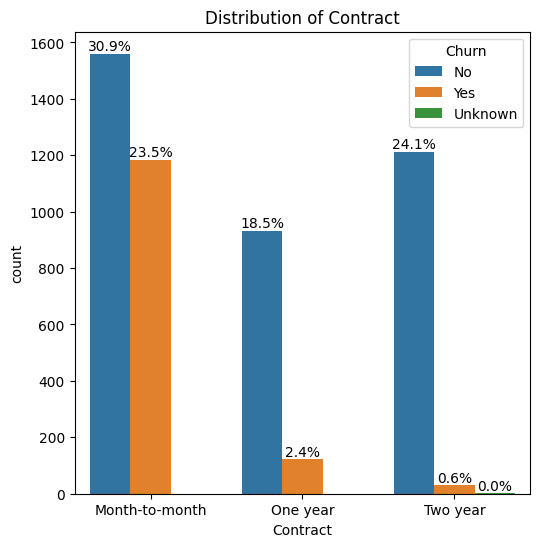

In [43]:
# Contract vs Target(Churn)
contract_type = ['Contract']
plot_categorical_feature_vs_target(df_train_eda, contract_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The 2 year contract has the lower churn rate as compared to the one year contract

- The month-to-month contract churn rate is not too distinct from the company churn rate of 26.49

3. How does the customer payment_method vary with the churn rate?

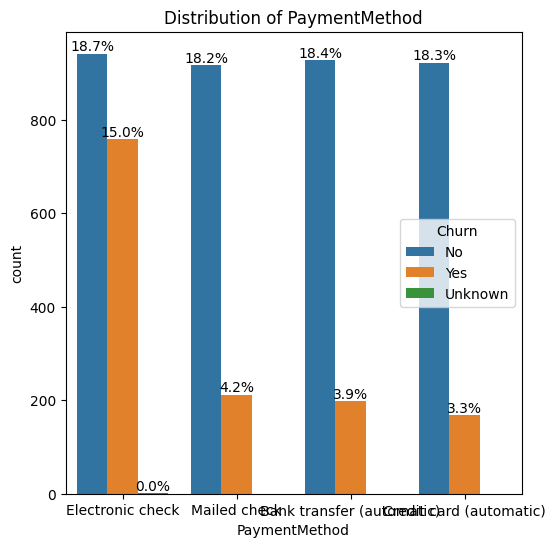

In [44]:
# Payment_method vs Target(Churn)
paymt_type = ['PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, paymt_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The Churn rate is highest for subcribers using Electronic check payments.

4. Is churn affected by the presence of partner or dependents?

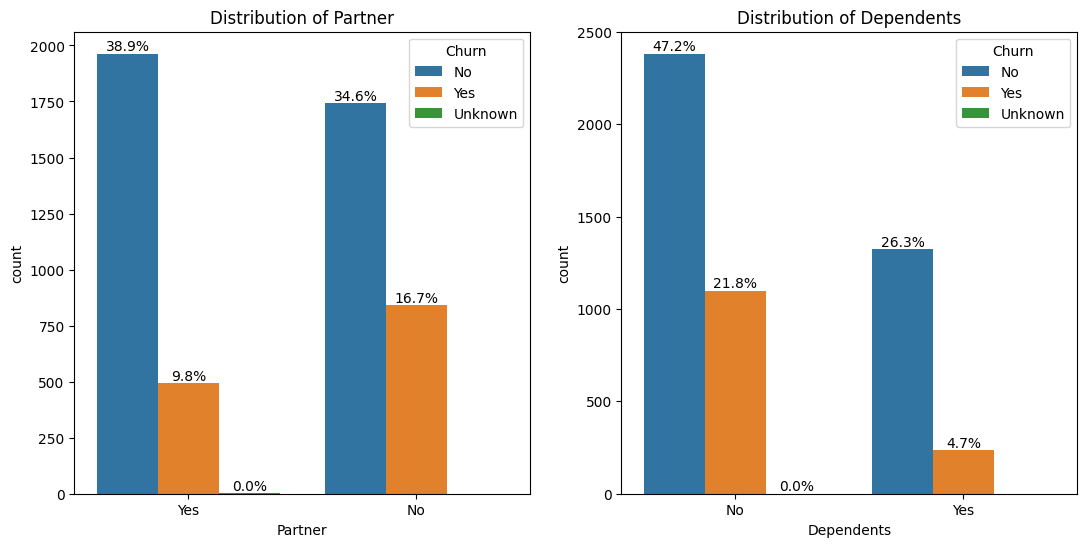

In [45]:
part_depend = ['Partner', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, part_depend, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

Subscribers without partners have higher churn rate(16.7%) in contrast with those having partners(9.8%)
Subscribers without Dependents also have higer churn rate(21.8%) in contrast with those having dependents(4.7)

In [46]:
churn_by_contract = df_train_eda.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum()).reset_index()
churn_by_contract

,Contract,Churn
0,Month-to-month,1184
1,One year,122
2,Two year,30


In [47]:
grouped_data = df_train_eda.groupby(['Contract', 'Churn'])['Churn'].count().rename('Breakdowm').reset_index()
grouped_data

,Contract,Churn,Breakdowm
0,Month-to-month,No,1560
1,Month-to-month,Yes,1184
2,One year,No,933
3,One year,Yes,122
4,Two year,No,1213
5,Two year,Unknown,1
6,Two year,Yes,30


In [48]:
grouped_data['Ratio'] = grouped_data.groupby('Contract')['Breakdowm'].transform(lambda x: x/x.sum()*100)
grouped_data

,Contract,Churn,Breakdowm,Ratio
0,Month-to-month,No,1560,56.851312
1,Month-to-month,Yes,1184,43.148688
2,One year,No,933,88.436019
3,One year,Yes,122,11.563981
4,Two year,No,1213,97.508039
5,Two year,Unknown,1,0.080386
6,Two year,Yes,30,2.411576


#### Key Insights
- Both df_3000 & df_2000 have the same number of columns
- Both df_3000 & df_2000 have the same column names
- df_3000 and df_2000 combined to one dataframe as df_train
- A copy of the original dataset has been created as df_train_eda and used for the EDA
- Convert the TotalCharges column to float and SeniorCitizen back to boolean dtype
- There are 6 columns which contains over 12% of missing values with one other column containing 5.3% of missing values
- There are no duplicated values in the df_train dataset
- A view of the unique values of the columns indicates irregular boolean dtype ie:['PhoneService'] has 4 unique values [False True 'Yes' 'No']
- Applied a standardization function to rectify the irregular boolean dtypes for the following: ('Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen')
- The most frequent values observed by columns are as follows: Male['gender'], Fiber optic['InternetService'], Month-to-month['Contract'] & Electronic check['PaymentMethod']
- For ease of analysis, the features segmented as follows:

  **target = Churn** The target variable

  **subscriber_account_numerical = [tenure, MonthlyCharges, TotalCharges]** 

  **subscriber_account_categorical = [Contract, PaperlessBilling, PaymentMethod, customerID]**
  
  **subscriber_demographic = [gender, Partner, SeniorCitizen, Dependents]**

  **subscribtions = [PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies]**
                                                            
- The Churn rate is 26.5%
- For the Subscriber Account segment, distribution of ['Contract'], 54% are month-to-month and the rest of the 46% are almost evenly split the annual & 2years contracts
- The Churn rate for the month-to-month contract is 23% in relation to the other contract types and is quite close the Company Churn rate of 26.5%
- The Churn rate for the Subscription are as follows: ['TechSupport'] = 4.4%(lowest), ['PhoneService'] = 24%, Fiber optic['InternetService']=18%
 ['StreamingTV'] = 11%, ['StreamingMovies'] = 12%, which is very similar.
- For the Distribution of ['PaymentMethod'], Electronic check['PaymentMethod'] has the highest Churn rate of 44% followed by Mailed check['PaymentMethod'] & Bank transfer (automatic)['PaymentMethod']
- The Churn rate for Subscriber Demographics are as follows: ['gender'] both Males and Females are the same approximately 13%, and those with ['Partners'] Churn at 9.8% versus those without Churn at 16%
- The Subscriber numerical features are not normally distributed
- Subscriber Account categorical features not normally distributed

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Data Splitting`

Use train_test_split with a random_state, and add stratify for Classification

`Impute Missing Values`

Use sklearn.impute.SimpleImputer

`Features Creation`


`Features Encoding`
From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

`Feature Scaling`

Use sklearn.preprocessing.StandardScaler to scale the numerical features.

`Train set Balancing`

Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

- **Data Splitting**

In [ ]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


[Back to Top](#Table-of-Contents)

## Step 4: Modeleling and Evaluation
Build, train, and test the four(4)models and models.

`Craete the Model`

`Train the Model`
use the following method to train the model: .fit() method

`Evaluate the Model on the Evaluation dataset`
Compute the valid metrics for the model

`Predict on the unknown dataset`
Use .predict method .predict_proba()

`Save the Model`

`repeat the above method by creating three(3)models`

`Model Comparison`

`Hyperparameter Analysis`


[Back to Top](#Table-of-Contents)

## Step 6: Document the entire process in an article on medium